In [1]:
import numpy as np
from matplotlib import pyplot as plt
import spectrum

# DOSUE-K

In [2]:
gain = 10.**(62*0.1) #  62 dB
freq, y, yerr = spectrum.create_spectrum(
        chi  = 1.e-10,
        T_noise = 100,
        gain = gain,
        time = 24., # sec
        freq_0 = 20.e+9, # [Hz] peak position
        freq_binwidth = 3.e+3, # [Hz] frequency bin width
        rebin = 15,
        A_eff= 17*1.e-2, # [m^2]
        freq_half_scale = 0.5, # freq_0*scale = freq span/2.
        doPlot=False);

chi     = 1e-10
A_eff   = 1700.0000000000002 [cm^2]
gain    = +62.000000 [dB]
T_noise = 100 [K]
d_nu    = 3.0 [kHz]
P_DP    = 8.648429519355715e-12 [W] (After *gain)
Noise   = 3.459818264601301e-14 [W] (After *gain)
Noise floor  = 6.564543603834735e-12 [W] (After *gain)
freq_center [10.000001 10.000004 10.000007 ... 29.999993 29.999996 29.999999]
power [6.54751140e-12 6.56086517e-12 6.59847420e-12 ... 6.56539541e-12
 6.53092426e-12 6.58968551e-12]


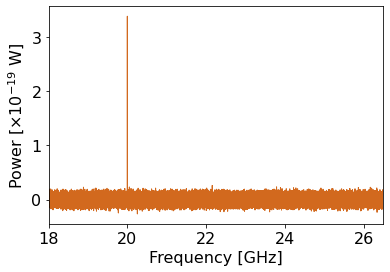

In [3]:
ymean = np.mean(y)
plt.plot(freq*1e-9, (y-ymean)*1e+19/gain, linewidth=1, color='chocolate')
plt.xlim(18.,26.5)
plt.tick_params(labelsize=16)
plt.xlabel('Frequency [GHz]', fontsize=16)
plt.ylabel(r'Power [$ \times 10^{-19}~\mathrm{W}$]', fontsize=16)
plt.savefig('figure/spectrum.pdf')

# DOSUE-Y

In [12]:
gain = 10.**(60*0.1) #  60 dB
# prototype
'''
freq, y, yerr = spectrum.create_spectrum(
        chi  = 1.e-8,
        T_noise = 300*2+100,
        gain = gain,
        time = 600., # sec
        freq_0 = 200.e+9, # [Hz] peak position
        freq_binwidth = 20.e+3, # [Hz] frequency bin width
        rebin = 1,
        A_eff= (0.71/2.)**2*np.pi * 0.5  * 1e-4, # [m^2] VDI horn antenna, eff=0.5
        freq_half_scale = 0.5, # freq_0*scale = freq span/2.
        doPlot=False)
'''
# kiban-A
freq, y, yerr = spectrum.create_spectrum(
        chi  = 7.e-11,
        T_noise = (100+50)*2,
        gain = gain,
        time = 3600.*24*7, # sec
        freq_0 = 200.e+9, # [Hz] peak position
        freq_binwidth = 20.e+3, # [Hz] frequency bin width
        rebin = 1,
        A_eff= (15/2.)**2*np.pi * 0.5  * 1e-4, # [m^2] phi15cm, eff=0.5
        freq_half_scale = 0.5, # freq_0*scale = freq span/2.
        doPlot=False)

chi     = 7e-11
A_eff   = 88.35729338221293 [cm^2]
gain    = +60.000000 [dB]
T_noise = 300 [K]
d_nu    = 20.0 [kHz]
P_DP    = 1.3897184169004854e-13 [W] (After *gain)
Noise   = 1.0651938291090612e-15 [W] (After *gain)
Noise floor  = 8.283894e-11 [W] (After *gain)
freq_center [100.      100.00002 100.00004 ... 299.99996 299.99998 300.     ]
power [8.28379622e-11 8.28392812e-11 8.28389761e-11 ... 8.28370860e-11
 8.28391265e-11 8.28385889e-11]


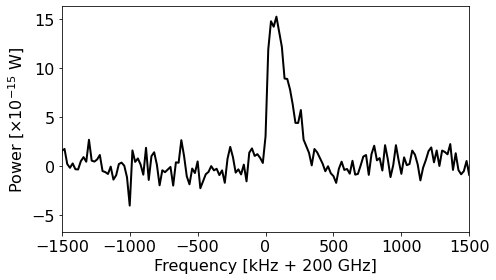

In [13]:
ymean = np.mean(y)
dfreq = 1.5e+6 # Hz
fconv = 1e-3
foffset = 200e+9 # Hz
funit = 'kHz'
foffset_label = '200 GHz'
fig = plt.figure(figsize=(7,4))
plt.plot((freq-foffset)*fconv, (y-ymean)*1e+15, linewidth=2, color='black')
plt.xlim(-dfreq*fconv,dfreq*fconv)
plt.tick_params(labelsize=16)
plt.xlabel(f'Frequency [{funit} + {foffset_label}]', fontsize=16)
plt.ylabel(r'Power [$ \times 10^{-15}~\mathrm{W}$]', fontsize=16)
plt.tight_layout()
plt.savefig('figure/sim_spectrum_dosue-A.pdf')

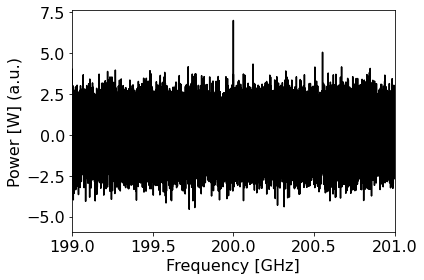

In [6]:
ymean = np.mean(y)
plt.plot(freq*1e-9, (y-ymean)*1e+15, linewidth=1.5, color='black')
plt.xlim(199.,201)
plt.tick_params(labelsize=16)
plt.xlabel('Frequency [GHz]', fontsize=16)
plt.ylabel(r'Power [W] (a.u.)', fontsize=16)
plt.tight_layout()
plt.savefig('figure/sim_spectrum_dosue-A2.pdf')